In [2]:
# TODO: Optimize MCMC code to run faster using parallelization or multithreading
# TODO: Add detailed docstrings to all functions and classes for better code documentation
# TODO: Implement unit tests
# TODO: Add more flexible parameter grid options for the models
# TODO: Investigate old code to understand why Spearman's rho used to be higher and orders were closer to the ideal order

import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import numpy as np
import pandas as pd
from scipy.stats import spearmanr, kendalltau
from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

## SIGMOID demo

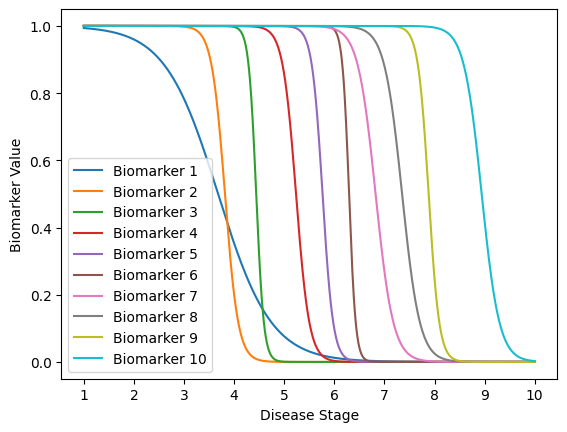

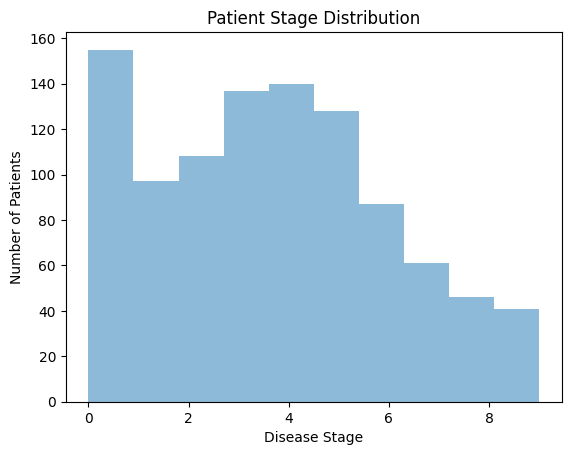

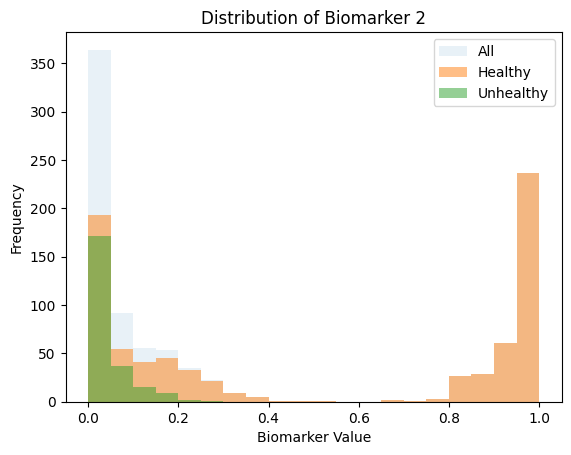

In [3]:
# model parameters
n_stages = 10
model_type = 'inv_sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 0.1, 'c': 0.6},
    1: {'s': 0.4, 'c': 3.2},
    2: {'s': 0.7, 'c': 15.0},
    3: {'s': 0.4, 'c': 30.0},
    4: {'s': 0.5, 'c': 40.0},
    5: {'s': 0.8, 'c': 50.0},
    6: {'s': 0.3, 'c': 60.0},
    7: {'s': 0.3, 'c': 70.0},
    8: {'s': 0.5, 'c': 80.0},
    9: {'s': 0.3, 'c': 90.0},
    9: {'s': 0.3, 'c': 100.0},
}

# generate the canonical model
logistic_model = CanonicalGenerator(n_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)
logistic_model = logistic_model.get_stage_values()

# plot disease progression
logistic_model.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(logistic_model,
                                   n_patients,
                                   dist_params={'loc': 3.5, 'scale': 3},
                                   add_noise=True,
                                   noise_std=0.1,
                                   random_state=2)

patient_samples = sample_generator.get_sample

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=0.5)

In [4]:
# run analysis
X = sample_generator.get_sample()[0]
y = sample_generator.get_sample()[1]

print(X.shape)

analyzer = DiseaseProgressionAnalyzer(X, y)
likelihood_matrix = analyzer.run_analysis('ebm')

# get parameters including spearman's rho
params = analyzer.ebm_analyzer.get_params()
rho = params['spearman_rho']
print("Spearman's rho:", rho)

(1000, 10)


KeyboardInterrupt: 

In [5]:
# run analysis
X = sample_generator.get_sample()[0]
y = sample_generator.get_sample()[1]

starting_pos = []
best_order = []
kendall_tau = []
spearman_rho = []
greedy_ascent = []
spearman_starting_order = []
spearman_greedy_ascent = []

for i in np.arange(6):
    analyzer = DiseaseProgressionAnalyzer(X, y)
    likelihood_matrix = analyzer.run_analysis('ebm')
    params = analyzer.ebm_analyzer.get_params()
     
    starting_pos.append(params['starting_order'])
    greedy_ascent.append(params['greedy_ascent'])
    best_order.append(params['best_order'])
    kendall_tau.append(params['kendall_tau'])
    spearman_rho.append(params['spearman_rho'])
    
    ideal_order = np.arange(len(params['starting_order']))
    spearman_starting, _ = spearmanr(ideal_order, params['starting_order'])
    spearman_greedy, _ = spearmanr(ideal_order, params['greedy_ascent'])
    
    spearman_starting_order.append(spearman_starting)
    spearman_greedy_ascent.append(spearman_greedy)
    
results_df = pd.DataFrame({
    'starting_order': starting_pos,
    'greedy_ascent_order': greedy_ascent,
    'best_order': best_order,
    'kendall_tau': kendall_tau,
    'spearman_rho': spearman_rho,
    'spearman_starting_order': spearman_starting_order,
    'spearman_greedy_ascent': spearman_greedy_ascent
})
file_name = f"ebm_{model_type}_results_legacy.csv"    
results_df.to_csv(file_name, index=False)

Starting Order: [0 2 6 8 5 4 7 3 1 9], kendall-tau:0.19999999999999998, spearmanr: 0.33333333333333326


100%|██████████| 10000/10000 [00:02<00:00, 3506.80it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:27<00:00, 3400.11it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [8 3 1 2 5 9 0 4 7 6], kendall-tau:0.1111111111111111, spearmanr: 0.13939393939393938


100%|██████████| 10000/10000 [00:03<00:00, 3318.46it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:20<00:00, 3559.07it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [8 6 0 1 4 7 2 9 5 3], kendall-tau:0.022222222222222223, spearmanr: -0.006060606060606061


100%|██████████| 10000/10000 [00:02<00:00, 3632.02it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:19<00:00, 3595.88it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [5 6 2 0 3 9 7 1 4 8], kendall-tau:0.15555555555555553, spearmanr: 0.2121212121212121


100%|██████████| 10000/10000 [00:02<00:00, 3623.16it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:22<00:00, 3519.96it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [8 9 2 5 1 6 7 0 4 3], kendall-tau:-0.3333333333333333, spearmanr: -0.4787878787878787


100%|██████████| 10000/10000 [00:02<00:00, 3646.41it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:18<00:00, 3611.23it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [0 9 1 3 8 2 6 5 4 7], kendall-tau:0.24444444444444444, spearmanr: 0.309090909090909


100%|██████████| 10000/10000 [00:02<00:00, 3620.91it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:19<00:00, 3580.38it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [0 5 7 2 4 9 1 8 3 6], kendall-tau:0.19999999999999998, spearmanr: 0.28484848484848485


100%|██████████| 10000/10000 [00:02<00:00, 3633.87it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:21<00:00, 3534.59it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [0 7 6 3 5 2 8 1 4 9], kendall-tau:0.15555555555555553, spearmanr: 0.28484848484848485


100%|██████████| 10000/10000 [00:02<00:00, 3686.79it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:17<00:00, 3623.95it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [6 4 1 2 0 9 3 8 7 5], kendall-tau:0.15555555555555553, spearmanr: 0.35757575757575755


100%|██████████| 10000/10000 [00:02<00:00, 3550.14it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:19<00:00, 3584.02it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)
Starting Order: [2 3 9 5 8 0 1 6 4 7], kendall-tau:0.1111111111111111, spearmanr: 0.10303030303030303


100%|██████████| 10000/10000 [00:02<00:00, 3519.66it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 2 1 0]


100%|██████████| 500000/500000 [02:18<00:00, 3612.63it/s]


Best Order:[3 4 5 6 7 8 9 2 1 0]
(1000, 10)
(1000,)


### Sigmoid

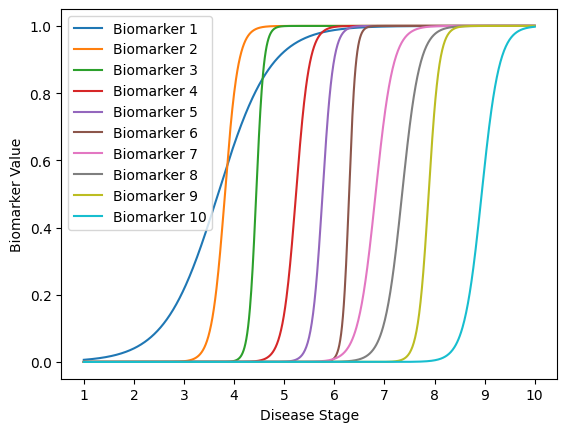

In [7]:
# model parameters
n_stages = 10
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 0.1, 'c': 0.6},
    1: {'s': 0.4, 'c': 3.2},
    2: {'s': 0.7, 'c': 15.0},
    3: {'s': 0.4, 'c': 30.0},
    4: {'s': 0.5, 'c': 40.0},
    5: {'s': 0.8, 'c': 50.0},
    6: {'s': 0.3, 'c': 60.0},
    7: {'s': 0.3, 'c': 70.0},
    8: {'s': 0.5, 'c': 80.0},
    9: {'s': 0.3, 'c': 90.0},
    9: {'s': 0.3, 'c': 100.0},
}

# generate the canonical model
logistic_model = CanonicalGenerator(n_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)
logistic_model = logistic_model.get_stage_values()
logistic_model.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(logistic_model,
                                   n_patients,
                                   dist_params={'loc': 3.5, 'scale': 3},
                                   add_noise=True,
                                   noise_std=0.1,
                                   random_state=2)

patient_samples = sample_generator.get_sample

In [5]:
# run analysis
X = sample_generator.get_sample()[0]
y = sample_generator.get_sample()[1]

analyzer = DiseaseProgressionAnalyzer(X, y)
likelihood_matrix = analyzer.run_analysis('ebm')

# get parameters including spearman's rho
params = analyzer.ebm_analyzer.get_params()
rho = params['spearman_rho']
print("Spearman's rho:", rho)

Starting Order: [7 3 5 2 4 1 0 8 6 9], kendall-tau:0.1111111111111111


100%|██████████| 10000/10000 [00:02<00:00, 3706.75it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 0 2 1]


100%|██████████| 500000/500000 [02:17<00:00, 3641.38it/s]


Best Order:[3 4 5 6 7 8 9 0 2 1]
(1000, 10)
(1000,)
Spearman's rho: -0.28484848484848485


In [8]:
# run analysis
X = sample_generator.get_sample()[0]
y = sample_generator.get_sample()[1]

starting_pos = []
best_order = []
kendall_tau = []
spearman_rho = []
greedy_ascent = []
spearman_starting_order = []
spearman_greedy_ascent = []

for i in np.arange(6):
    analyzer = DiseaseProgressionAnalyzer(X, y)
    likelihood_matrix = analyzer.run_analysis('ebm')
    params = analyzer.ebm_analyzer.get_params()
     
    starting_pos.append(params['starting_order'])
    greedy_ascent.append(params['greedy_ascent'])
    best_order.append(params['best_order'])
    kendall_tau.append(params['kendall_tau'])
    spearman_rho.append(params['spearman_rho'])
    
    ideal_order = np.arange(len(params['starting_order']))
    spearman_starting, _ = spearmanr(ideal_order, params['starting_order'])
    spearman_greedy, _ = spearmanr(ideal_order, params['greedy_ascent'])
    
    spearman_starting_order.append(spearman_starting)
    spearman_greedy_ascent.append(spearman_greedy)
    
results_df = pd.DataFrame({
    'starting_order': starting_pos,
    'greedy_ascent_order': greedy_ascent,
    'best_order': best_order,
    'kendall_tau': kendall_tau,
    'spearman_rho': spearman_rho,
    'spearman_starting_order': spearman_starting_order,
    'spearman_greedy_ascent': spearman_greedy_ascent
})
file_name = f"ebm_{model_type}_results_legacy.csv"    
results_df.to_csv(file_name, index=False)

Starting Order: [5 0 2 3 8 6 1 7 4 9], kendall-tau:0.37777777777777777, spearmanr: 0.49090909090909085


100%|██████████| 10000/10000 [00:02<00:00, 3662.29it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 0 2 1]


100%|██████████| 500000/500000 [02:18<00:00, 3600.52it/s]


Best Order:[3 4 5 6 7 8 9 0 2 1]
(1000, 10)
(1000,)
Starting Order: [1 8 3 5 9 4 2 0 7 6], kendall-tau:0.022222222222222223, spearmanr: 0.05454545454545454


100%|██████████| 10000/10000 [00:02<00:00, 3493.67it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 0 2 1]


100%|██████████| 500000/500000 [02:20<00:00, 3552.75it/s]


Best Order:[3 4 5 6 7 8 9 0 2 1]
(1000, 10)
(1000,)
Starting Order: [5 3 1 4 7 8 2 9 0 6], kendall-tau:0.1111111111111111, spearmanr: 0.13939393939393938


100%|██████████| 10000/10000 [00:02<00:00, 3484.51it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 0 2 1]


100%|██████████| 500000/500000 [02:22<00:00, 3516.29it/s]


Best Order:[3 4 5 6 7 8 9 0 2 1]
(1000, 10)
(1000,)
Starting Order: [7 9 1 0 3 8 4 2 5 6], kendall-tau:0.022222222222222223, spearmanr: -0.09090909090909088


100%|██████████| 10000/10000 [00:02<00:00, 3485.36it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 0 2 1]


100%|██████████| 500000/500000 [02:21<00:00, 3545.77it/s]


Best Order:[3 4 5 6 7 8 9 0 2 1]
(1000, 10)
(1000,)
Starting Order: [0 3 8 5 1 4 6 2 9 7], kendall-tau:0.37777777777777777, spearmanr: 0.49090909090909085


100%|██████████| 10000/10000 [00:02<00:00, 3654.51it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 0 2 1]


100%|██████████| 500000/500000 [02:18<00:00, 3621.03it/s]


Best Order:[3 4 5 6 7 8 9 0 2 1]
(1000, 10)
(1000,)
Starting Order: [2 3 1 0 8 5 6 9 7 4], kendall-tau:0.37777777777777777, spearmanr: 0.6121212121212121


100%|██████████| 10000/10000 [00:02<00:00, 3643.17it/s]


Greedy Ascent Result: [3 4 5 6 7 8 9 0 2 1]


100%|██████████| 500000/500000 [02:19<00:00, 3580.97it/s]


Best Order:[3 4 5 6 7 8 9 0 2 1]
(1000, 10)
(1000,)


### TRANSITION MATRIX demo

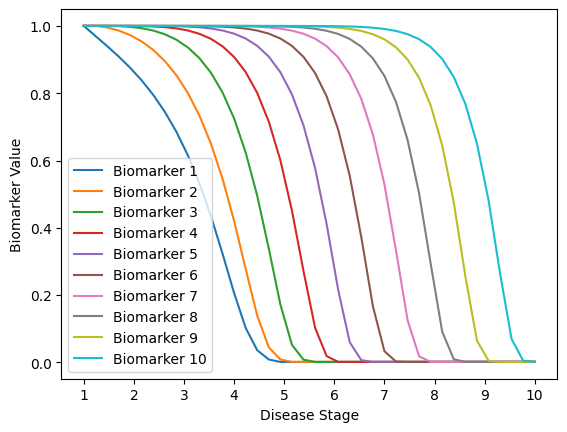

In [6]:
# model parameters
n_biomarker_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 1.5e-1}

# generate the canonical model
transition_model = CanonicalGenerator(n_biomarker_stages, model_type, biomarkers_params=biomarkers_params_transition)
transition_model.plot_disease_progression() # plot disease progression

stage_values = transition_model.get_stage_values()

# generate patient samples
sample_generator = SampleGenerator(stage_values, n_patients = 1000, add_noise=True, noise_std = 0.08, random_state=2)
patient_samples = sample_generator.patient_samples

In [8]:
# run analysis
X = sample_generator.get_sample()[0]
y = sample_generator.get_sample()[1]

analyzer = DiseaseProgressionAnalyzer(X, y)
likelihood_matrix = analyzer.run_analysis('ebm')

# get parameters including spearman's rho
params = analyzer.ebm_analyzer.get_params()
rho = params['spearman_rho']
print("Spearman's rho:", rho)

ValueError: zero-size array to reduction operation minimum which has no identity

## ODE demo

self.time_points length: 203, self.model_values[0] length: 203
self.time_points length: 203, self.model_values[1] length: 203
self.time_points length: 203, self.model_values[2] length: 203
self.time_points length: 203, self.model_values[3] length: 203
self.time_points length: 203, self.model_values[4] length: 203
self.time_points length: 203, self.model_values[5] length: 203
self.time_points length: 203, self.model_values[6] length: 203
self.time_points length: 203, self.model_values[7] length: 203
self.time_points length: 203, self.model_values[8] length: 203
self.time_points length: 203, self.model_values[9] length: 203


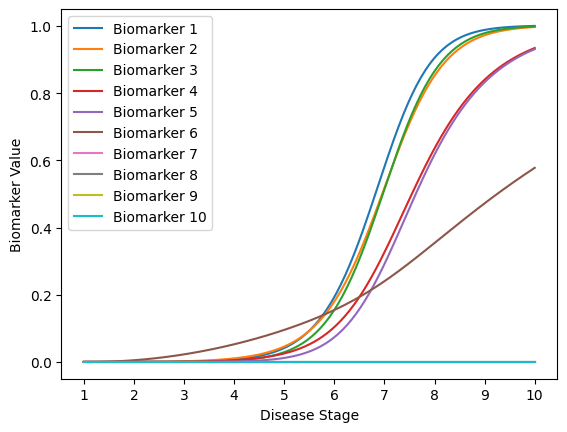

In [9]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'logistic'

# generate the canonical model
logistic_model = CanonicalGenerator(n_biomarker_stages, model_type)
logistic_values = logistic_model.get_stage_values()
logistic_model.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(logistic_values,
                                   n_patients,
                                   dist_params={'loc': 3.5, 'scale': 3},
                                   add_noise=True,
                                   noise_std=0.1,
                                   random_state=2)

patient_samples = sample_generator.get_sample()

In [ ]:
# run analysis
X = sample_generator.get_sample()[0]
y = sample_generator.get_sample()[1]

starting_pos = []
best_order = []
kendall_tau = []
spearman_rho = []
greedy_ascent = []
spearman_starting_order = []
spearman_greedy_ascent = []

for i in np.arange(6):
    analyzer = DiseaseProgressionAnalyzer(X, y)
    likelihood_matrix = analyzer.run_analysis('ebm')
    params = analyzer.ebm_analyzer.get_params()
     
    starting_pos.append(params['starting_order'])
    greedy_ascent.append(params['greedy_ascent'])
    best_order.append(params['best_order'])
    kendall_tau.append(params['kendall_tau'])
    spearman_rho.append(params['spearman_rho'])
    
    ideal_order = np.arange(len(params['starting_order']))
    spearman_starting, _ = spearmanr(ideal_order, params['starting_order'])
    spearman_greedy, _ = spearmanr(ideal_order, params['greedy_ascent'])
    
    spearman_starting_order.append(spearman_starting)
    spearman_greedy_ascent.append(spearman_greedy)
    
results_df = pd.DataFrame({
    'starting_order': starting_pos,
    'greedy_ascent_order': greedy_ascent,
    'best_order': best_order,
    'kendall_tau': kendall_tau,
    'spearman_rho': spearman_rho,
    'spearman_starting_order': spearman_starting_order,
    'spearman_greedy_ascent': spearman_greedy_ascent
})
file_name = f"ebm_{model_type}_results_legacy.csv"    
results_df.to_csv(file_name, index=False)

In [4]:
best_order = params['best_order']
print(best_order)

[8 2 0 1 3 4 5 6 7 9]


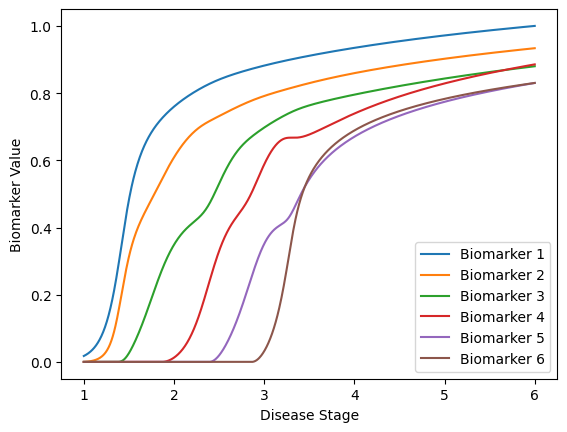

In [11]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 6
model_type = 'acp'

# generate the canonical model
logistic_model = CanonicalGenerator(n_biomarker_stages, model_type)
logistic_values = logistic_model.get_stage_values()
logistic_model.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(logistic_values,
                                   n_patients,
                                   dist_params={'loc': 3.5, 'scale': 3},
                                   add_noise=True,
                                   noise_std=0.1,
                                   random_state=2)

patient_samples = sample_generator.get_sample()